<h1>Auswertung</h1>

In [85]:
# save the data into a pickle to save some time
import pickle


# load it
with open('./data/output_df_wth_all_nr_all_perc_reading.pickle', 'rb') as handle:
    data = pickle.load(handle) 

In [86]:
# try to export the data table without the text and title
# after that, excel should be able to import my data the right way

data_wo_text = data[['style', 'year', 'year_dt', 'nr_token', 'nr_adj',
       'nr_noun', 'nr_verb', 'nr_adverb', 'per_verb', 'per_noun', 'per_adj',
       'per_adverb', 'flesch_reading_ease', 'smog_index',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'text_standard']]

In [18]:
data_wo_text.to_csv('./data/data_wo_text.csv', sep=';')

In [87]:
import pandas as pd
d = pd.DataFrame()
d = d.from_csv('./data/data_wo_text.csv', sep=';')

# put drop all the nr_columns
d = d[['style', 'year', 'year_dt', 'per_verb', 'per_noun', 'per_adj', 'per_adverb','text_standard']]

/home/robinarthur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


<h3>zur besseren Auswertung werden die Daten in verschiedene Tabellen geteilt.</h3>

In [88]:
# how many styles i have?
# print(set(d['style']))
# --> {'Gedicht ', 'Philo ', 'Drama ', 'Epik ', 'Nacherz ', 'Historie ', 'Brief '}
#
# so i need 7 tables, one for every style
# in this tables there have to be only 1 row for every year, not more!!
# 

data_tbl_gedicht = d.loc[d['style'] == 'Gedicht ']
data_tbl_philo = d.loc[d['style'] == 'Philo ']
data_tbl_drama = d.loc[d['style'] == 'Drama ']
data_tbl_epik = d.loc[d['style'] == 'Epik ']
data_tbl_nacherz = d.loc[d['style'] == 'Nacherz ']
data_tbl_historie = d.loc[d['style'] == 'Historie ']
data_tbl_brief = d.loc[d['style'] == 'Brief ']

# this should have the length of 663
# --> 663 - check
# print(len(data_tbl_gedicht + data_tbl_philo + data_tbl_drama + data_tbl_epik + data_tbl_nacherz + data_tbl_historie + data_tbl_brief))


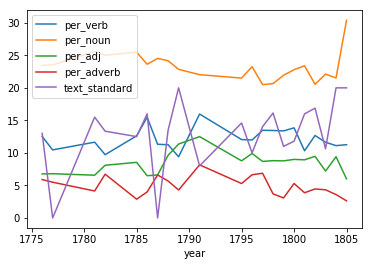

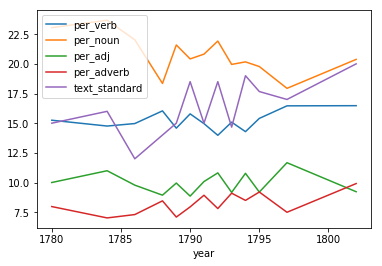

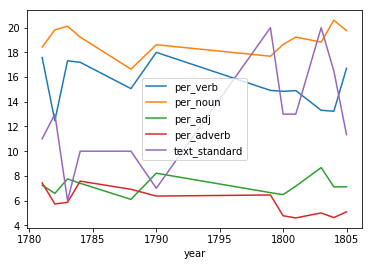

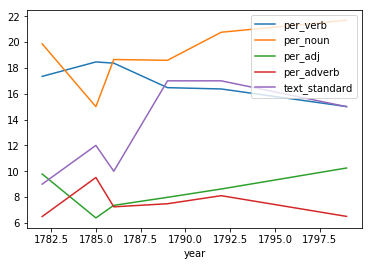

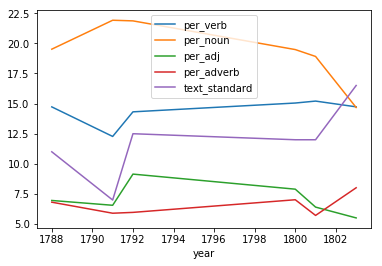

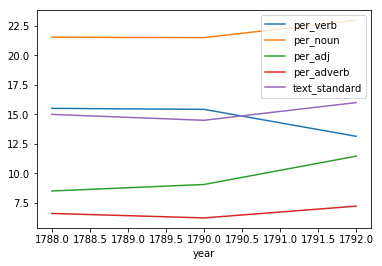

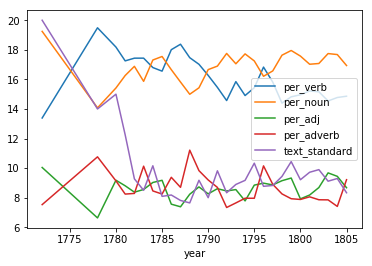

In [89]:
# build the average per year
data_tbl_gedicht = data_tbl_gedicht.groupby('year').mean().plot()
data_tbl_philo = data_tbl_philo.groupby('year').mean().plot()
data_tbl_drama = data_tbl_drama.groupby('year').mean().plot()
data_tbl_epik = data_tbl_epik.groupby('year').mean().plot()
data_tbl_nacherz = data_tbl_nacherz.groupby('year').mean().plot()
data_tbl_historie = data_tbl_historie.groupby('year').mean().plot()
data_tbl_brief = data_tbl_brief.groupby('year').mean().plot()

In [90]:
#d

<h2> Gesamtverteilung </h2>

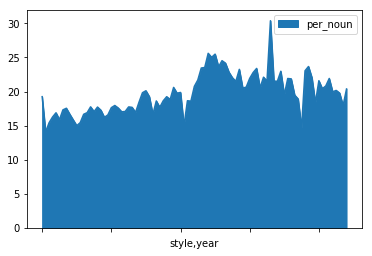

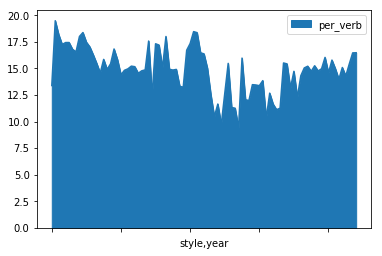

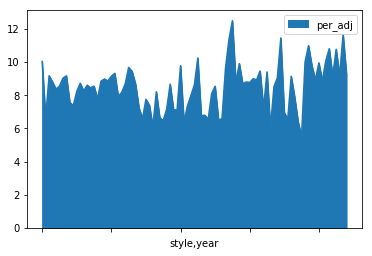

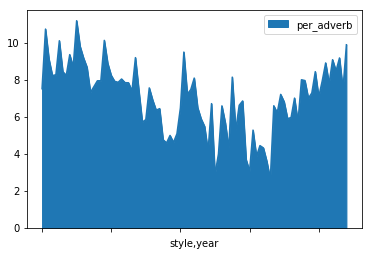

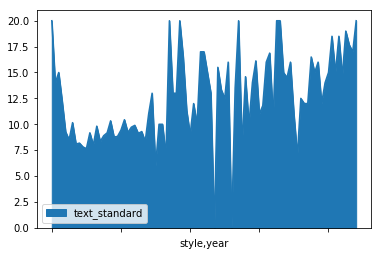

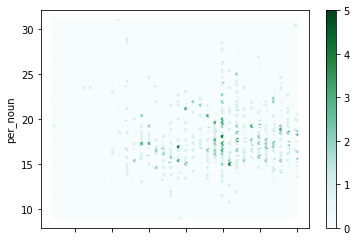

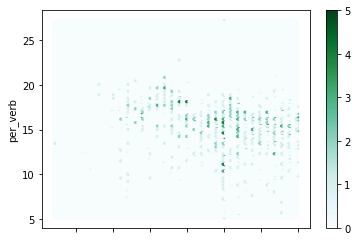

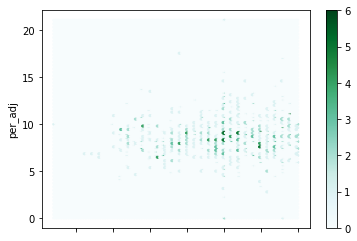

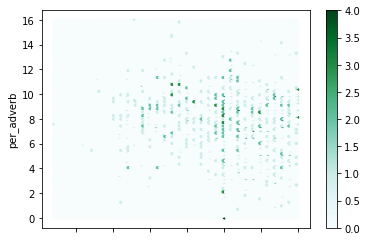

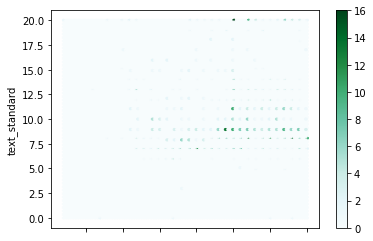

In [174]:
# and now the tables and charts for the 'itemnumbers'

data_tbl_per_noun = d[['year', 'style', 'per_noun']]
data_tbl_per_verb = d[['year', 'style', 'per_verb']]
data_tbl_per_adj = d[['year', 'style', 'per_adj']]
data_tbl_per_adverb = d[['year', 'style', 'per_adverb']]
data_tbl_text_standard = d[['year', 'style', 'text_standard']]

###############################
#
# i need the following for the radar plot at the end:
#
#radar_noun = data_tbl_per_noun[['style', 'per_noun']].groupby('style').mean()
#radar_verb = data_tbl_per_verb[['style', 'per_verb']].groupby('style').mean()
#radar_adjec= data_tbl_per_adj[['style', 'per_adj']].groupby('style').mean()
#radar_adverb = data_tbl_per_adverb[['style', 'per_adverb']].groupby('style').mean()
#print(radar_adverb)
####################################

# this should have the length of 663
# --> 663 - check
# print(len(data_tbl_gedicht + data_tbl_philo + data_tbl_drama + data_tbl_epik + data_tbl_nacherz + data_tbl_historie + data_tbl_brief))

# build the average per year
data_plt_per_noun = data_tbl_per_noun.groupby(['style','year']).mean().plot.area()
data_plt_per_verb = data_tbl_per_verb.groupby(['style','year']).mean().plot.area()
data_plt_per_adj = data_tbl_per_adj.groupby(['style','year']).mean().plot.area()
data_plt_per_adverb = data_tbl_per_adverb.groupby(['style','year']).mean().plot.area()
data_plt_text_standard = data_tbl_text_standard.groupby(['style','year']).mean().plot.area()
data_tbl_per_noun.plot.hexbin('year', 'per_noun' )
data_tbl_per_verb.plot.hexbin('year', 'per_verb' )
data_tbl_per_adj.plot.hexbin('year', 'per_adj' )
data_tbl_per_adverb .plot.hexbin('year', 'per_adverb' )
data_tbl_text_standard.plot.hexbin('year', 'text_standard' )

<h2> Wieviel Werke sind pro Jahr in der Datenbank</h2>

In [92]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
#%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
from pandas.plotting import register_matplotlib_converters as rmc
rmc()

In [93]:
# create a schiller style color palette
schiller_type_colors = ['#78C850',  # Grass
                        #'#F08030',  # Fire
                        #'#6890F0',  # Water
                        #'#A8B820',  # Bug
                        #'#A8A878',  # Normal
                        #'#A040A0',  # Poison
                        '#F8D030',  # Electric
                        #'#E0C068',  # Ground
                        #'#EE99AC',  # Fairy
                        '#C03028',  # Fighting
                        #'#F85888',  # Psychic
                        #'#B8A038',  # Rock
                        #'#705898',  # Ghost
                        #'#98D8D8',  # Ice
                        '#7038F8',  # Dragon
                       ]

"\nx_pos = [x for x in range(1776, 1806)]\nprint(x_pos)\n# swarm plot with schiller color palette\nsns.swarmplot(x='year', y='nr_token', data=df,\n             palette=schiller_type_colors)\nplt.xticks(rotation=90)\n# Thus we have to give more margin:\nplt.subplots_adjust(bottom=0.4)\n\nplt.axvline(8, color='r', linestyle='--', lw=2)\nplt.plot()\n"

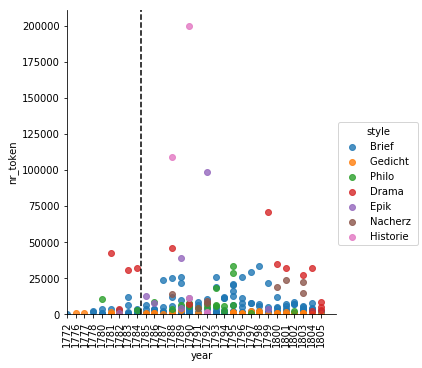

In [104]:
df = data.sort_values(["year"], ascending=True)[["name", "nr_token", "year", "style"]]

# Plot using Seaborn
sns.lmplot(x='year', y='nr_token', data=df,
          fit_reg=False,
          hue='style')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.xticks(rotation=90)

plt.axvline(8.5, color="k", linestyle="--");





"""
x_pos = [x for x in range(1776, 1806)]
print(x_pos)
# swarm plot with schiller color palette
sns.swarmplot(x='year', y='nr_token', data=df,
             palette=schiller_type_colors)
plt.xticks(rotation=90)
# Thus we have to give more margin:
plt.subplots_adjust(bottom=0.4)

plt.axvline(8, color='r', linestyle='--', lw=2)
plt.plot()
"""

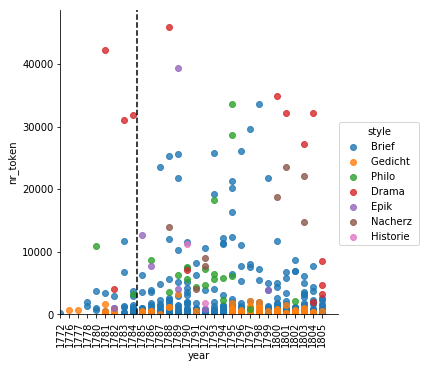

In [103]:
# ok, dann ohne die vier ausreiser da oben

data_wo_4_big = data.drop(['0045','0109', '0055', '0012'], axis=0)
df_wo_4_big = data_wo_4_big.sort_values(["year"], ascending=True)[["name", "nr_token", "year", "style"]]


# Plot using Seaborn
sns.lmplot(x='year', y='nr_token', data=df_wo_4_big,
          fit_reg=False,
          hue='style')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.xticks(rotation=90)

plt.axvline(8.5, color="k", linestyle="--");

In [8]:
df.T

number,0117,0014,0020,0130,0131,0101,0113,0132,0110,0094,...,0652,0651,0650,0649,0662,0124,0121,0098,0653,0663
name,An Frau Elisabetha Margaretha Stoll,Der Abend,der Eroberer,An Scharffenstein,An Bolgeol,Über den Zusammenhang der thierischen Natur de...,An Christophine Schiller,An Hauptmann von Hoven,An Oberst von Seeger,An Heribert von Dalberg,...,an S Crusius,an K Gross,an W Humboldt,an C Reinhart,an W Goethe,Warbeck,Die Maltheser,an die Freude II,an F Rochlitz,an G Koerner
nr_token,236,695,765,2001,1249,10821,665,1015,3732,3398,...,266,651,1394,406,2520,4657,3159,530,134,1589
year,1772,1776,1777,1778,1778,1780,1780,1780,1780,1781,...,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805
style,Brief,Gedicht,Gedicht,Brief,Brief,Philo,Brief,Brief,Brief,Brief,...,Brief,Brief,Brief,Brief,Brief,Drama,Drama,Gedicht,Brief,Brief


Text(0.5,1,'')

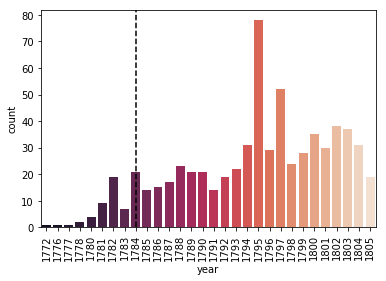

In [105]:
# Bar plot
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='year', data=df, palette="rocket") # rocket,deep. pastel (palette=)

# Rotate x-labels
plt.xticks(rotation=90)
plt.axvline(8, color="k", linestyle="--")
plt.title('')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

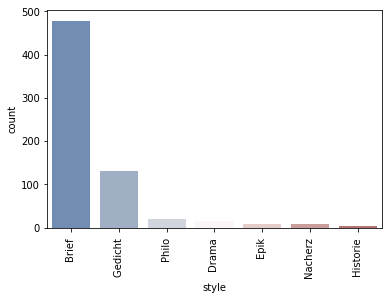

In [11]:
# Bar plot
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='style', data=df, palette="vlag")

# Rotate x-labels
plt.xticks(rotation=90)

<h2>Verteilung der Textlänge über der Zeit</h2>

Aus dem vorhandenen DataFrame wird nun ein neuer erzeugt, der lediglich die beiden Felder 
year und nr_token besitzt.

In [106]:
text_length = data[["year", "nr_token", "style"]]
text_length.head()

,year,nr_token,style
number,,,
0001,1805,8504.0,Drama
0002,1790,7132.0,Drama
0003,1803,27192.0,Drama
0004,1804,1987.0,Drama
0005,1801,32199.0,Drama


Ab jetzt wird es visuell! Die %-Anweisung wird benötigt, damit Jupyter die Plots direkt im Notebook anzeigen kann.
Hier wird matplotlib zur Visualisierung benutzt, die numpy-Bibliothek für die numerische Datenverarbeitung 
wird später noch häufiger benötigt.

Mehr zur Inline-Darstellung in Jupyter: https://ipython.readthedocs.io/en/stable/interactive/plotting.html

Mehr zu matplotlib: https://matplotlib.org

Mehr zu numpy: http://www.numpy.org

Mehr zu set_index: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html

Mehr zu agg: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

Mehr zu rename: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

text_length = text_length.groupby(['style', 'year']).sum()

sns.set(style="whitegrid")

data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)





#data['year'] = pd.to_datetime(data['year_dt'], errors='coerce')
#data[["year", "nr_token"]].set_index("year").resample('M').agg({'nr_token': 'mean'}).rename(columns={'nr_token': '#tokens'}).plot()
#data[["year", "nr_token"]].set_index("year").resample('M').agg({'nr_token': 'mean'}).rename(columns={'nr_token': '#tokens'}).plot()

NameError: name 'values' is not defined

In [16]:
data

,name,style,text,year,year_dt,nr_token,nr_adj,nr_noun,nr_verb,nr_adverb,...,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
number,,,,,,,,,,,,,,,,,,,,,
0001,Demetrius,Drama,Demetrius an der russischen Grenze Er ist vo...,1805,1805-01-01,8486.0,600.0,1681.0,1482.0,515.0,...,68.10,9.7,8.7,12.30,13.3,6.94,1233.0,6.250000,13.86,9.0
0002,Der versöhnte Menschenfeind,Drama,Der versöhnte Menschenfeind - Fragment Gegend...,1790,1790-01-01,7127.0,584.0,1328.0,1286.0,453.0,...,79.70,8.6,6.3,11.37,11.5,6.71,1026.0,4.900000,12.42,7.0
0003,Die Braut von Messina,Drama,Die Braut von Messina oder die feindlichen Brü...,1803,1803-01-01,27129.0,2348.0,5122.0,3624.0,1342.0,...,1.47,10.0,19.8,12.07,16.8,6.76,2753.0,10.800000,15.41,20.0
0004,Die Huldigung der Künste,Drama,Ihrer Kaiserl. Hoheit der Frau Erbprinze...,1804,1804-01-01,1985.0,157.0,452.0,242.0,83.0,...,8.20,9.2,19.3,11.79,17.2,7.75,300.0,6.714286,18.38,19.0
0005,Die Jungfrau von Orleans,Drama,Die Jungfrau von Orleans Eine romantische Trag...,1801,1801-01-01,32189.0,2308.0,6195.0,4801.0,1480.0,...,6.24,9.1,18.0,11.49,14.0,6.27,2783.0,65.000000,12.87,13.0
0006,Die Räuber,Drama,Die Räuber Ein Schauspiel Quae medicame...,1781,1781-01-01,42202.0,3047.0,7807.0,7432.0,3133.0,...,79.30,8.0,6.5,10.21,10.9,6.03,4148.0,5.888889,10.81,11.0
0007,Die Verschwörung des Fiesco zu Genua,Drama,Die Verschwörung des Fiesco zu Genua Ein repub...,1783,1783-01-01,30978.0,2404.0,6242.0,5382.0,1814.0,...,76.93,8.0,5.3,11.41,9.8,5.87,3303.0,16.750000,8.76,6.0
0008,Don Carlos,Drama,"Don Carlos, Infant von Spanien Ein dramatisch...",1788,1788-01-01,45823.0,2795.0,7636.0,6911.0,3164.0,...,3.56,7.7,17.0,10.44,10.9,5.72,3281.0,3.000000,9.91,10.0
0009,Kabale und Liebe,Drama,Kabale und Liebe Ein bürgerliches Trauerspiel...,1784,1784-01-01,31778.0,2347.0,6126.0,5484.0,2405.0,...,82.04,8.0,5.4,10.14,9.7,5.83,3037.0,3.214286,9.57,10.0


<h2>Liste der längsten Werke</h2>

Mehr zur Sortierung: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

Mehr zur Spaltenauswahl: https://pandas.pydata.org/pandas-docs/stable/indexing.html

In [98]:
data.sort_values(["nr_token"], ascending=False)[["name", "nr_token", "style", "year"]].head(10)

,name,nr_token,style,year
number,,,,
0045,die Geschichte des 30jaehrigen Krieges,198543.0,Historie,1790
0109,Geschichte des Abfalls der Vereinigten Niederl...,108142.0,Historie,1788
0055,Geschichten aus dem alten Pitaval,98003.0,Epik,1792
0012,Wallenstein,71183.0,Drama,1799
0008,Don Carlos,45823.0,Drama,1788
0006,Die Räuber,42202.0,Drama,1781
0021,der Geisterseher,39057.0,Epik,1789
0010,Maria Stuart,34801.0,Drama,1800
0486,an W Goethe,33495.0,Brief,1798


In [100]:
data.sort_values(["nr_token"], ascending=False)[["name", "nr_token", "style", "year"]].tail(10)

,name,nr_token,style,year
number,,,,
0151,Deutschland und seine Fürsten,41.0,Gedicht,1795
0193,Majestas populi,39.0,Gedicht,1797
0171,Die schönste Erscheinung,36.0,Gedicht,1797
0191,Ilias,34.0,Gedicht,1795
0088,das Höchste,26.0,Gedicht,1795
0085,das Kind in der Wiege,25.0,Gedicht,1795
0087,Theophanie,23.0,Gedicht,1795
0078,Zeus zu Herkules,22.0,Gedicht,1795
0089,Unsterblichkeit,22.0,Gedicht,1795


<h1> hier müssen noch die größten und kleinsten Werke der einzelnen Werkarten gezeigt werden </h1>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 0001 to 0663
Data columns (total 24 columns):
name                            663 non-null object
style                           663 non-null object
text                            663 non-null object
year                            663 non-null object
year_dt                         663 non-null datetime64[ns]
nr_token                        663 non-null float64
nr_adj                          663 non-null float64
nr_noun                         663 non-null float64
nr_verb                         663 non-null float64
nr_adverb                       663 non-null float64
per_verb                        663 non-null float64
per_noun                        663 non-null float64
per_adj                         663 non-null float64
per_adverb                      663 non-null float64
flesch_reading_ease             663 non-null float64
smog_index                      663 non-null float64
flesch_kincaid_grade            663 non-null 

In [20]:
data

,name,style,text,year,year_dt,nr_token,nr_adj,nr_noun,nr_verb,nr_adverb,...,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
number,,,,,,,,,,,,,,,,,,,,,
0001,Demetrius,Drama,Demetrius an der russischen Grenze Er ist vo...,1805,1805-01-01,8486.0,600.0,1681.0,1482.0,515.0,...,68.10,9.7,8.7,12.30,13.3,6.94,1233.0,6.250000,13.86,9.0
0002,Der versöhnte Menschenfeind,Drama,Der versöhnte Menschenfeind - Fragment Gegend...,1790,1790-01-01,7127.0,584.0,1328.0,1286.0,453.0,...,79.70,8.6,6.3,11.37,11.5,6.71,1026.0,4.900000,12.42,7.0
0003,Die Braut von Messina,Drama,Die Braut von Messina oder die feindlichen Brü...,1803,1803-01-01,27129.0,2348.0,5122.0,3624.0,1342.0,...,1.47,10.0,19.8,12.07,16.8,6.76,2753.0,10.800000,15.41,20.0
0004,Die Huldigung der Künste,Drama,Ihrer Kaiserl. Hoheit der Frau Erbprinze...,1804,1804-01-01,1985.0,157.0,452.0,242.0,83.0,...,8.20,9.2,19.3,11.79,17.2,7.75,300.0,6.714286,18.38,19.0
0005,Die Jungfrau von Orleans,Drama,Die Jungfrau von Orleans Eine romantische Trag...,1801,1801-01-01,32189.0,2308.0,6195.0,4801.0,1480.0,...,6.24,9.1,18.0,11.49,14.0,6.27,2783.0,65.000000,12.87,13.0
0006,Die Räuber,Drama,Die Räuber Ein Schauspiel Quae medicame...,1781,1781-01-01,42202.0,3047.0,7807.0,7432.0,3133.0,...,79.30,8.0,6.5,10.21,10.9,6.03,4148.0,5.888889,10.81,11.0
0007,Die Verschwörung des Fiesco zu Genua,Drama,Die Verschwörung des Fiesco zu Genua Ein repub...,1783,1783-01-01,30978.0,2404.0,6242.0,5382.0,1814.0,...,76.93,8.0,5.3,11.41,9.8,5.87,3303.0,16.750000,8.76,6.0
0008,Don Carlos,Drama,"Don Carlos, Infant von Spanien Ein dramatisch...",1788,1788-01-01,45823.0,2795.0,7636.0,6911.0,3164.0,...,3.56,7.7,17.0,10.44,10.9,5.72,3281.0,3.000000,9.91,10.0
0009,Kabale und Liebe,Drama,Kabale und Liebe Ein bürgerliches Trauerspiel...,1784,1784-01-01,31778.0,2347.0,6126.0,5484.0,2405.0,...,82.04,8.0,5.4,10.14,9.7,5.83,3037.0,3.214286,9.57,10.0


Text(0.5,1,'Anzahl der Werke')

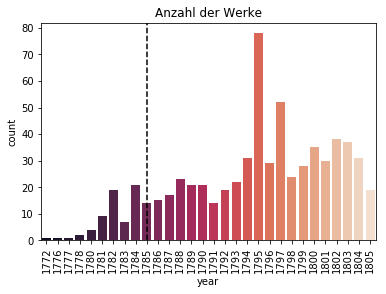

In [162]:
#Count the books

# Bar plot
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='year', data=data, palette="rocket")

# Rotate x-labels
plt.xticks(rotation=90)
plt.axvline(9, color="k", linestyle="--")
plt.title('Anzahl der Werke')

/home/robinarthur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Anzahl der Wörter')

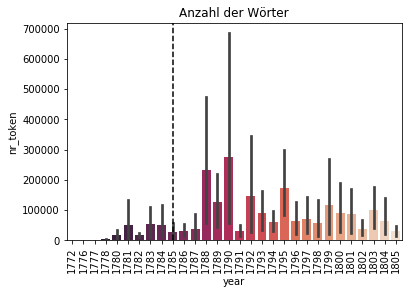

In [160]:
# sum up the tokens (entfernen der beiden Hauptarbeiten ist noch anzuwenden)

df = data[["nr_token", "year"]]
df["nr_token"] = df["nr_token"].astype('int64')
df.groupby(['year'])['nr_token'].sum()

sns.barplot(x="year", y="nr_token", data=df, estimator=sum,
            palette="rocket")

# Rotate x-labels
plt.xticks(rotation=90)
plt.axvline(9, color="k", linestyle="--")
plt.title('Anzahl der Wörter')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 0001 to 0663
Data columns (total 24 columns):
name                            663 non-null object
style                           663 non-null object
text                            663 non-null object
year                            663 non-null object
year_dt                         663 non-null datetime64[ns]
nr_token                        663 non-null float64
nr_adj                          663 non-null float64
nr_noun                         663 non-null float64
nr_verb                         663 non-null float64
nr_adverb                       663 non-null float64
per_verb                        663 non-null float64
per_noun                        663 non-null float64
per_adj                         663 non-null float64
per_adverb                      663 non-null float64
flesch_reading_ease             663 non-null float64
smog_index                      663 non-null float64
flesch_kincaid_grade            663 non-null 

start with the spaghetti plots

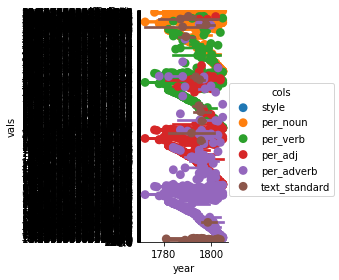

In [184]:
data["year"] = data["year"].astype('int64')
# per noun table
df_noun = data[['style', 'year', 'per_noun', 'per_verb', 'per_adj', 'per_adverb', 'text_standard']]# 'per_verb', 'per_adverb', 'text_standard'
df_noun.groupby('style', as_index=True)['per_noun'].mean()

#print(df_noun)


#df_noun.plot(x='year', y='per_noun', kind='bar')
#plt.show()



#df = pd.DataFrame({'X_Axis':[1,3,5,7,10,20],
#                   'col_2':[.4,.5,.4,.5,.5,.4],
#                   'col_3':[.7,.8,.9,.4,.2,.3],
#                   'col_4':[.1,.3,.5,.7,.1,.0],
#                   'col_5':[.5,.3,.6,.9,.2,.4]})

#print (df)
#   X_Axis  col_2  col_3  col_4  col_5
#0       1    0.4    0.7    0.1    0.5
#1       3    0.5    0.8    0.3    0.3
#2       5    0.4    0.9    0.5    0.6
#3       7    0.5    0.4    0.7    0.9
#4      10    0.5    0.2    0.1    0.2
#5      20    0.4    0.3    0.0    0.4

df = df_noun.melt('year', var_name='cols',  value_name='vals')
g = sns.factorplot(x="year", y="vals", hue='cols', data=df)

In [63]:
print(df_complete)

In [56]:
#libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

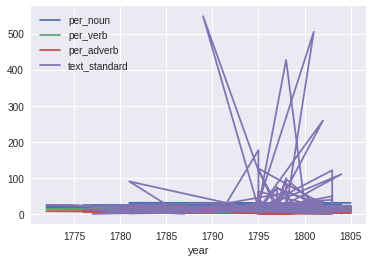

<h1> geplanter Abschluss </h1>
<h2> ein facetten / radar chart als Gesamtübersicht der Eigenschaften der Werkarten</h2>

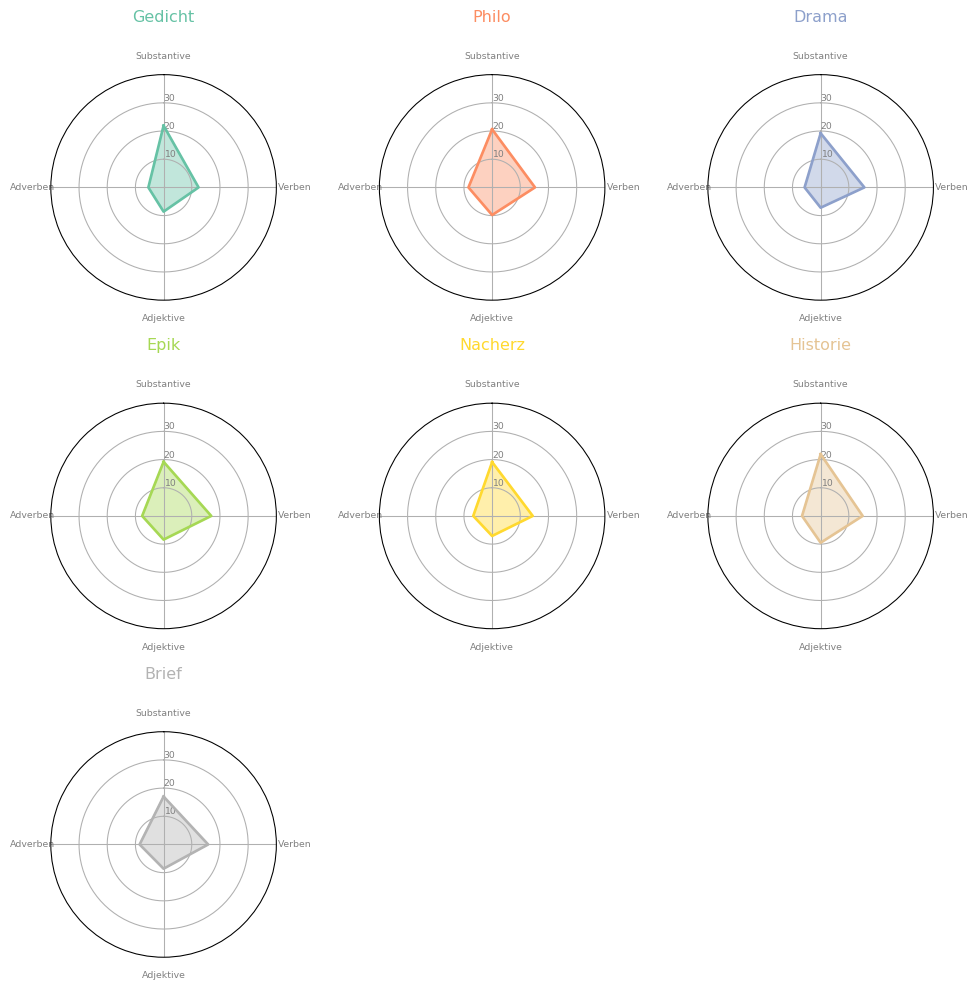

In [157]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
#
#
#             per_noun     per_verb     per_adj     per_adverb
# style               
# Brief      17.002634     15.777084    8.644375    8.481646
# Drama      19.185251     15.481722    7.189818    5.680463
# Epik       19.238434     16.858595    8.374700    7.617986
# Gedicht    21.907033     12.396593    8.606924    5.365494
# Historie   21.881628     14.877931    9.522846    6.572920
# Nacherz    19.111306     14.417974    7.146650    6.682052
# Philo      20.600199     15.153603    9.831002    8.378756
#
#
#

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Werkart': ['Gedicht', 'Philo', 'Drama', 'Epik', 'Nacherz', 'Historie', 'Brief'],
'Substantive': [8.6, 9.8, 7.2, 8.4, 7.1, 9.5, 8.6],
'Verben': [5.4, 8.4, 5.7, 7.6, 6.7, 6.6, 8.5],
'Adjektive': [ 21.9, 20.6, 19.2, 19.2, 19.1, 21.9, 17],
'Adverben': [12.4, 15.2, 15.5, 16.9, 14.4, 14.9, 15.8]
})

df2 = df[['Substantive', 'Verben', 'Adjektive', 'Adverben']]
# ------- PART 1: Define a function that do a plot for one line of the dataset!


def make_spider( row, title, color):
    # number of variable
    categories=list(df2)
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=7)
    plt.tight_layout()
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
 
    # Ind1
    values=df.loc[row].drop('Werkart').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=12, color=color, y=1.2)
    # some spacing in between
    plt.tight_layout()


# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['Werkart'][row], color=my_palette(row))